In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
lambdas = [2.5, 3, 3.5, 4]
experiments = []
for i, lambda1 in enumerate(lambdas):
    for lambda2 in lambdas[i:]:
        experiments.append(f'lambda_{lambda1}_{lambda2}' if lambda1 != lambda2 else f'lambda_{lambda1}')
experiments

['lambda_2.5',
 'lambda_2.5_3',
 'lambda_2.5_3.5',
 'lambda_2.5_4',
 'lambda_3',
 'lambda_3_3.5',
 'lambda_3_4',
 'lambda_3.5',
 'lambda_3.5_4',
 'lambda_4']

In [4]:
t_lim = 10

In [25]:
critical_values = {}
for experiment in experiments:
    with open(f'results/{experiment}/results_{experiment}.json', 'r') as f:
        results = json.load(f)
    N = results['N']
    nruns = results['nruns']
    crange = np.linspace(*results['crange'])
    print(f'{experiment}: {N} {nruns} {results["crange"]}')
    results = results['results']

    T = []
    for result in results:
        T.append(np.mean([
            max(item['t'] for item in run['cascade'])
            for run in result['runs']
        ]))

    max_t = max(item['t']
                for result in results
                for run in result['runs']
                for item in run['cascade'])
    
    n_ap = {t: [] for t in range(max_t + 1)}
    gcc_size = {t: [] for t in range(max_t + 1)}

    for result in results:

        n_ap_loc = {t: 0 for t in range(max_t + 1)}
        gcc_size_loc = {t: 0 for t in range(max_t + 1)}
        num_gcc_t = {t: 0 for t in range(max_t + 1)}

        for run in result['runs']:
            for item in run['cascade']:

                n_ap_loc[item['t']] += item['n_ap']
                gcc_size_loc[item['t']] += item['gcc_size']
                num_gcc_t[item['t']] += 1

        for t in range(max_t + 1):

            n_ap[t].append(n_ap_loc[t] / nruns / N)
            gcc_size[t].append(gcc_size_loc[t] / num_gcc_t[t] / N
                            if num_gcc_t[t]
                            else gcc_size[t - 1][-1])
    
    t = min(10, max_t)
    critical_values[experiment] = {
        'c_crit': crange[np.argmax(n_ap[t])],
        't': t,
    }

lambda_2.5: 100000 10 [0.0, 12.0, 200]
lambda_2.5_3: 100000 10 [0.0, 12.0, 200]
lambda_2.5_3.5: 100000 10 [0.0, 12.0, 200]
lambda_2.5_4: 100000 10 [0.0, 12.0, 200]
lambda_3: 100000 10 [0.0, 12.0, 200]
lambda_3_3.5: 100000 10 [0.0, 12.0, 200]
lambda_3_4: 100000 10 [0.0, 12.0, 200]
lambda_3.5: 100000 10 [0.0, 12.0, 200]
lambda_3.5_4: 100000 10 [0.0, 12.0, 200]
lambda_4: 100000 10 [0.0, 12.0, 200]


In [26]:
critical_values

{'lambda_2.5': {'c_crit': 0.0, 't': 8},
 'lambda_2.5_3': {'c_crit': 10.492462311557789, 't': 10},
 'lambda_2.5_3.5': {'c_crit': 9.889447236180905, 't': 10},
 'lambda_2.5_4': {'c_crit': 9.64824120603015, 't': 10},
 'lambda_3': {'c_crit': 7.959798994974874, 't': 10},
 'lambda_3_3.5': {'c_crit': 7.296482412060302, 't': 10},
 'lambda_3_4': {'c_crit': 6.994974874371859, 't': 10},
 'lambda_3.5': {'c_crit': 6.633165829145728, 't': 10},
 'lambda_3.5_4': {'c_crit': 6.331658291457286, 't': 10},
 'lambda_4': {'c_crit': 6.030150753768844, 't': 10}}

In [39]:
c_crit = [
    [
        # critical_values['lambda_2.5']['c_crit'],
        # TODO TODO TODO RECALCULATE FOR LARGER C INTERVAL
        12,
        critical_values['lambda_2.5_3']['c_crit'],
        critical_values['lambda_2.5_3.5']['c_crit'],
        critical_values['lambda_2.5_4']['c_crit'],
    ],
    [
        critical_values['lambda_2.5_3']['c_crit'],
        critical_values['lambda_3']['c_crit'],
        critical_values['lambda_3_3.5']['c_crit'],
        critical_values['lambda_3_4']['c_crit'],
    ],
    [
        critical_values['lambda_2.5_3.5']['c_crit'],
        critical_values['lambda_3_3.5']['c_crit'],
        critical_values['lambda_3.5']['c_crit'],
        critical_values['lambda_3.5_4']['c_crit'],
    ],
    [
        critical_values['lambda_2.5_4']['c_crit'],
        critical_values['lambda_3_4']['c_crit'],
        critical_values['lambda_3.5_4']['c_crit'],
        critical_values['lambda_4']['c_crit'],
    ]
]
c_crit = np.array(c_crit)
c_crit

array([[12.        , 10.49246231,  9.88944724,  9.64824121],
       [10.49246231,  7.95979899,  7.29648241,  6.99497487],
       [ 9.88944724,  7.29648241,  6.63316583,  6.33165829],
       [ 9.64824121,  6.99497487,  6.33165829,  6.03015075]])

In [40]:
c_crit == c_crit.T

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [41]:
plt.rc('text', usetex=True)
plt.rc('font', size=22, **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['savefig.bbox'] = 'tight'

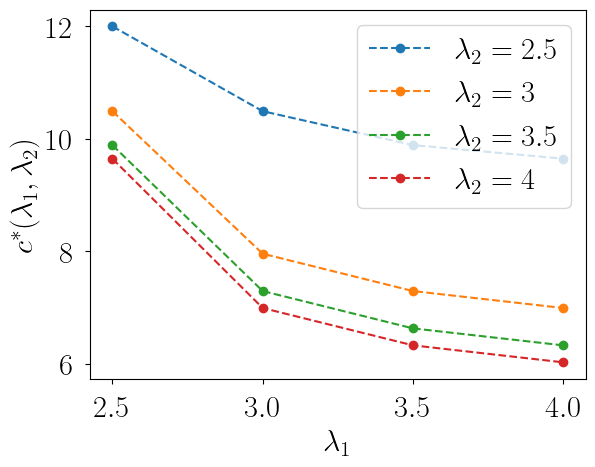

In [42]:
plt.plot(lambdas, c_crit, 'o--', label=[rf'$\lambda_2 = {lambda2}$' for lambda2 in lambdas])
plt.xticks(lambdas)
plt.xlabel(r'$\lambda_1$')
plt.ylabel(r'$c^*(\lambda_1, \lambda_2)$')
plt.legend();

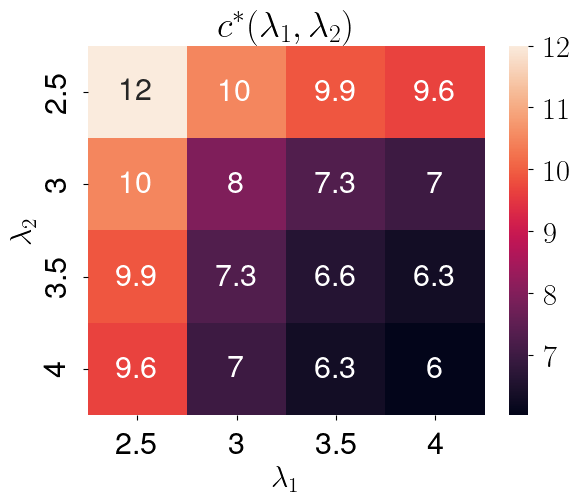

In [43]:
ax = sns.heatmap(c_crit, xticklabels=lambdas, yticklabels=lambdas, annot=True)
ax.set_xlabel(r'$\lambda_1$')
ax.set_ylabel(r'$\lambda_2$')
ax.set_title(r'$c^*(\lambda_1, \lambda_2)$');